# A) Setup and Data Prep

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering

In [ ]:
df = pd.read_csv("./loans_train_prepared-1.csv")
data = np.array(df.values, dtype=float)
print('(number of examples, number of attributes): ', data.shape)

(number of examples, number of attributes):  (614, 16)


In [ ]:
colors = np.array(['orange', 'blue', 'lime', 'blue', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

def clustering_scatterplotDBSCAN(points, labels, title):
      n_clusters = np.unique(labels).size
      for i in range(n_clusters):
          h = plt.scatter(points[labels==i-1,0],
                          points[labels==i-1,1], 
                          c=colors[i],
                          label = 'cluster '+str(i))

      _ = plt.title(title)
      _ = plt.legend()
      _ = plt.xlabel('x')
      _ = plt.ylabel('y')

# B. Init K Value of 10

I Picked 10 as my init K Value. When compared to picking 4 for a 4 column data set versus this data set which is 16 coloumns, I thought it would be a nice middle ground to start at.

In [ ]:
k = 10

In [ ]:
clustered_data_sklearn10 = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)

In [ ]:
data_and_centers10 = np.r_[data,clustered_data_sklearn10.cluster_centers_]

# B1. Applting Muli-Dimensional Scaling(MDS) to project both the data and the k-Means cluster centers to a 2D space

In [ ]:
XYcoordinates10 = manifold.MDS(n_components=2).fit_transform(data_and_centers10)
print("transformation complete")

transformation complete


I am performing multi-dimensional scaling on the data and K means centers and these are then been plotted in a 2D space.


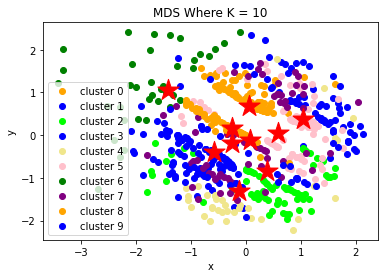

In [ ]:
clustering_scatterplot(points=XYcoordinates10[:-k,:], 
                       labels=clustered_data_sklearn10.labels_, 
                       centers=XYcoordinates10[-k:,:], 
                       title='MDS Where K = 10')

# B2. Apply t-SNE to project both the data and the k-Means cluster centers to a 2D space

In [ ]:
XYcoordinates10TSNE = manifold.TSNE(n_components=2).fit_transform(data_and_centers10)
print("transformation complete")

transformation complete


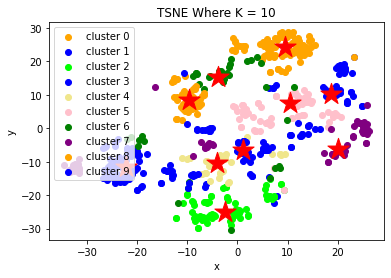

In [ ]:
clustering_scatterplot(points=XYcoordinates10TSNE[:-k,:], 
                       labels=clustered_data_sklearn10.labels_,
                       centers=XYcoordinates10TSNE[-k:,:], 
                       title='TSNE Where K = 10')

# C Init K Value of 8

I wanted to see if there was much differnce in the plots by change the value of K to 8

In [ ]:
k = 8

In [ ]:
clustered_data_sklearn8 = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)

In [ ]:
data_and_centers8 = np.r_[data,clustered_data_sklearn8.cluster_centers_]

# C1. Applting Muli-Dimensional Scaling(MDS) to project both the data and the k-Means cluster centers to a 2D space

In [ ]:
XYcoordinates8MDS = manifold.MDS(n_components=2).fit_transform(data_and_centers8)
print("transformation complete")

transformation complete


I am performing multi-dimensional scaling on the data and K means centers and these are then been plotted in a 2D space.


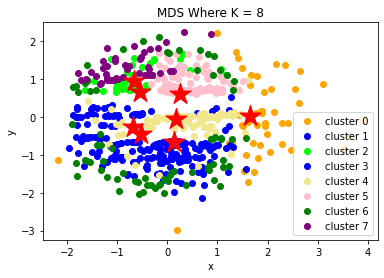

In [ ]:
clustering_scatterplot(points=XYcoordinates8MDS[:-k,:], 
                       labels=clustered_data_sklearn8.labels_, 
                       centers=XYcoordinates8MDS[-k:,:], 
                       title='MDS Where K = 8')

# C2. Apply t-SNE to project both the data and the k-Means cluster centers to a 2D space

In [ ]:
XYcoordinates8TSNE = manifold.TSNE(n_components=2).fit_transform(data_and_centers8)
print("transformation complete")

transformation complete


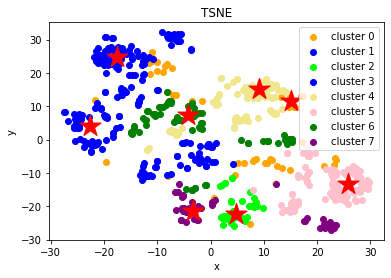

In [ ]:
clustering_scatterplot(points=XYcoordinates8TSNE[:-k,:], 
                       labels=clustered_data_sklearn8.labels_,
                       centers=XYcoordinates8TSNE[-k:,:], 
                       title='TSNE')

In [ ]:
df['cluster'] = pd.Series(clustered_data_sklearn10.labels_, index=df.index)

In [ ]:
df.head()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome,cluster
0,0.000000,1.084523,1.058140,0.75,1,1,0,0,0,0,0,0,0,1,1,0.841086,2
1,0.333333,0.925883,1.047319,0.75,1,1,0,1,0,0,0,0,0,0,0,0.871711,9
2,0.000000,0.683858,0.635920,0.75,1,1,0,1,0,1,0,0,0,1,1,0.385189,3
3,0.000000,0.608992,1.002824,0.75,1,1,0,1,0,0,0,1,0,1,1,0.717012,7
4,0.000000,1.101869,1.115650,0.75,1,1,0,0,0,0,0,0,0,1,1,0.860305,2


In [ ]:
df.tail()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome,cluster
609,0.000000,0.666409,0.676143,0.750,1,0,0,0,0,0,0,0,0,0,1,0.364708,2
610,1.000000,0.858916,0.395858,0.375,1,1,0,1,0,0,0,0,0,0,1,0.587496,8
611,0.333333,1.313719,1.566110,0.750,1,1,0,1,0,0,0,0,0,1,1,1.116075,3
612,0.666667,1.267616,1.325676,0.750,1,1,0,1,0,0,0,0,0,1,1,1.042256,3
613,0.000000,0.925883,1.074155,0.750,0,0,0,0,0,1,0,0,1,0,0,0.663523,1


In [ ]:
df.groupby('cluster').mean()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
cluster,,,,,,,,,,,,,,,,
0,0.295019,0.902643,1.126708,0.725575,1.000000,1.000000,0.000000,1.000000,0.000000,0.126437,0.022989,0.000000,1.000000,0.000000,0.896552,0.878018
1,0.130952,0.852451,0.994118,0.718750,0.875000,0.000000,0.053571,0.303571,0.017857,0.160714,0.071429,0.125000,0.946429,0.000000,0.767857,0.715034
2,0.045045,0.794831,0.880658,0.734797,0.945946,0.486486,0.013514,0.000000,0.013514,0.067568,0.067568,0.108108,0.000000,0.810811,0.648649,0.654030
3,0.352941,0.883441,1.063066,0.697941,0.988235,0.941176,0.011765,1.000000,0.000000,0.094118,0.070588,0.000000,0.000000,1.000000,0.823529,0.854199
4,0.186275,0.705791,1.000217,0.676471,0.117647,0.852941,0.029412,0.794118,0.000000,0.088235,0.000000,0.852941,0.147059,0.617647,0.000000,0.702102
5,0.081081,0.870285,1.016795,0.732432,0.972973,0.986486,0.000000,0.000000,0.013514,0.121622,0.054054,0.324324,0.527027,0.000000,0.783784,0.804172
6,0.341880,1.961865,1.731580,0.711538,0.871795,0.743590,0.076923,0.692308,0.000000,0.333333,0.076923,0.051282,0.333333,0.282051,0.615385,1.927427
7,0.453125,0.766268,1.000261,0.697266,0.984375,0.953125,0.000000,1.000000,0.000000,0.125000,0.046875,1.000000,0.343750,0.281250,0.812500,0.714190
8,0.299320,0.850258,1.094688,0.689796,0.979592,0.979592,0.020408,1.000000,0.000000,0.163265,0.061224,0.000000,0.000000,0.000000,1.000000,0.906991


Conclussion



1.   Cluster 0 has the lowest level of dependents while cluster 8 has the highest
2.   Cluster 5 presents a loan status on NO
3. All the clusters apart from cluster 6 are majority males. In cluster 6 there is no Males
4. Most cluster have similar incomes apart from cluster 4 which seems to have a significatly higher income.




# D Task 3 - Sum of Squared Distances and Finding best value of K.

## D1. Elbow Method

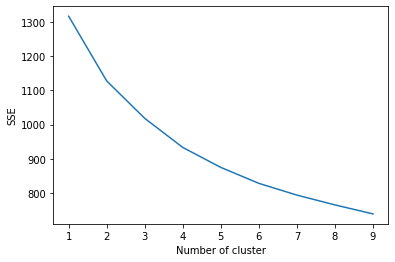

In [ ]:
X = pd.DataFrame(data)

datas = X

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(datas)
    datas["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

Using the elbow method we can try and establish which value of K would be best suited to our data. 

We have elbows at 2,4 and 6 I am going to pick the elbow with the lowest sum of squared errors (SSE) and see how that goes. In this case it will be 6.

As I already made a guess of 8 in a previous evaluation it will be interesting to see if there is much difference.

## D2. K value of 6

In [ ]:
k=6

In [ ]:
clustered_data_sklearn6 = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)

In [ ]:
data_and_centers6 = np.r_[data,clustered_data_sklearn6.cluster_centers_]

### Apply t-SNE to project both the data and the k-Means cluster centers to a 2D space

In [ ]:
XYcoordinates6 = manifold.MDS(n_components=2).fit_transform(data_and_centers6)
print("transformation complete")

transformation complete


Get the X and Y coordinates of all the points and centers after completing manifold learning on the data and centers.


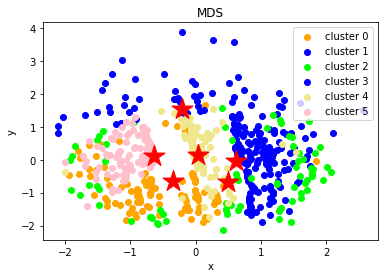

In [ ]:
clustering_scatterplot(points=XYcoordinates6[:-k,:], 
                       labels=clustered_data_sklearn6.labels_, 
                       centers=XYcoordinates6[-k:,:], 
                       title='MDS')

On the examination of this plot and comparing it to the previous pltos of K values 8 and 10 we can see that this plot contains the least amount of overlapping and is a lot more viusally appealing. It appears to be the best plot for out data

### Apply t-SNE to project both the data and the k-Means cluster centers to a 2D space

In [ ]:
XYcoordinates6 = manifold.TSNE(n_components=2).fit_transform(data_and_centers6)
print("transformation complete")

transformation complete


Get the X and Y coordinates of all the points and centers after completing manifold learning on the data and centers.


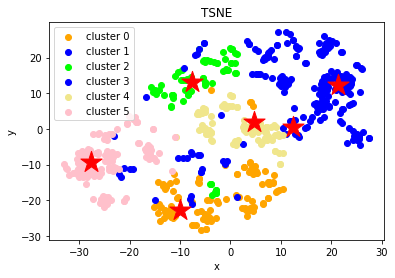

In [ ]:
clustering_scatterplot(points=XYcoordinates6[:-k,:], 
                       labels=clustered_data_sklearn6.labels_,
                       centers=XYcoordinates6[-k:,:], 
                       title='TSNE')

# E Using a new clustering algorithim - DBSCAN

There are two parameters to the algorithm, min_samples and eps, which define formally what we mean when we say dense. Higher min_samples or lower eps indicate higher density necessary to form a cluster.

min_samples mainly controlls how tolerant the algorithim is towards noise

eps is a cruicial value and must be choosen carefully.If choosen wrong it can cause values to be classed as noise or if too large it can cause clusters to merge and even return the whole dataset to one cluster

In [ ]:
clustered_data_sklearn = cluster.DBSCAN(eps=0.5, min_samples = 10).fit(data)
labels = clustered_data_sklearn.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 6
Estimated number of noise points: 455


We have  a nice number of clusters with these parameters settings.

In [ ]:
data_and_centers = np.r_[data]
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


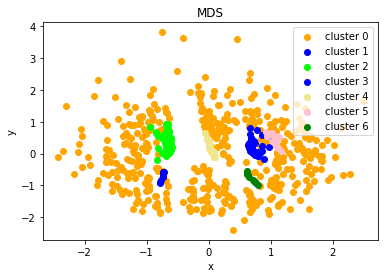

In [ ]:
clustering_scatterplotDBSCAN(points=XYcoordinates, 
                       labels=clustered_data_sklearn.labels_,
                       title='MDS')

### Apply t-SNE to project both the data and the k-Means cluster centers to a 2D space

In [ ]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


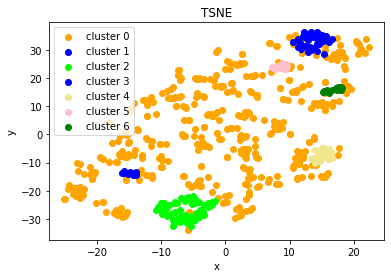

In [ ]:
clustering_scatterplotDBSCAN(points=XYcoordinates, 
                       labels=clustered_data_sklearn.labels_,
                       title='TSNE')